In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Plotting & visualizing data
from sklearn import preprocessing
import keras #Building & training neural networks
import tensorflow as tf # Backend framework for ML/DL

In [ ]:
import pandas as pd
ipl = pd.read_csv('/content/ipl_data.csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [ ]:
#Dropping certain features
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)
df


,venue,bat_team,bowl_team,batsman,bowler,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
...,...,...,...,...,...,...
76009,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129
76010,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129
76011,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129
76012,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129


In [ ]:
X = df.drop(['total'], axis =1)
y = df['total']


In [ ]:
#Label Encoding
#string values into numerical--labelencoder
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

In [ ]:
# Train test Split # scikit learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.preprocessing import MinMaxScaler  #normalization----range oto 1

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Define the neural network model
import keras #Building & training neural networks
import tensorflow as tf # Backend framework for ML/DL
model = keras.Sequential([
        keras.layers.Input( shape=(X_train_scaled.shape[1],)), # Input layer
        keras.layers.Dense(512, activation='relu'), # Hidden layer with 512 units and ReLU activation(#Rectified Linear Unit)
        keras.layers.Dense(216, activation='relu'), # Hidden layer with 216 units and ReLU activation
        keras.layers.Dense(1, activation='linear') # Output layer with linear activation for regression
])#This adds a dense (fully connected) layer with 512 neurons, and each neuron uses the ReLU activation.

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0) # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss) #Adaptive optimizer for training deep learning models.
# Use Huber loss for regression

Huber loss is a robust loss function that is less sensitive to outliers than Mean Squared Error (MSE), but more precise than Mean Absolute Error (MAE) near the optimum.

Parameter	Description
X_train_scaled	Input features for training (already scaled, e.g., via StandardScaler)
y_train	Target/output values for training
epochs=50	Model will train for 50 complete passes through the training dataset
batch_size=64	The model updates weights after every 64 samples (mini-batch gradient descent)
validation_data=...	Evaluates the model on test data after each epoch (for monitoring overfitting)

In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 56.0673 - val_loss: 22.0869
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 22.2381 - val_loss: 22.1085
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 22.2374 - val_loss: 22.0512
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 22.3716 - val_loss: 21.8954
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 22.2203 - val_loss: 21.8852
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 22.2825 - val_loss: 22.0862
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 22.0710 - val_loss: 21.8983
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 21.9808 - val_loss: 21.8110
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 21.9927 - val_loss: 22.0988
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 22.0685 - val_loss: 21.7572
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 22.1093 - val_loss: 21.8105
Epoch 12/50
832/832 ━━━━━━━━━━

<Axes: >

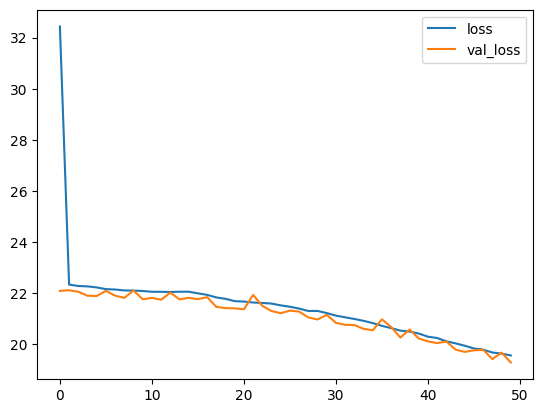

In [ ]:
model_losses = pd.DataFrame(history.history)
model_losses.plot()

In [ ]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


19.77223777770996

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(), description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(), description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
	with output:
		clear_output() # Clear the previous output


		# Decode the encoded values back to their original values
		decoded_venue = venue_encoder.transform([venue.value])
		decoded_batting_team = batting_team_encoder.transform([batting_team.value])
		decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
		decoded_striker = striker_encoder.transform([striker.value])
		decoded_bowler = bowler_encoder.transform([bowler.value])


		input = np.array([decoded_venue, decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
		input = input.reshape(1,5)
		input = scaler.transform(input)
		#print(input)
		predicted_score = model.predict(input)
		predicted_score = int(predicted_score[0,0])

		print(predicted_score)


In [ ]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)


Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()